In [1]:
pip install smote_variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 5.2 MB/s 
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=117de6801ff623f4744d3f301e23159fdef39a489021bb1e7d7b0f02082f2493
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7454 sha256=7badb5a728d6995d1edecf139bbf1b763f07aa7e6dbe3f0b80b6235631affbc7
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built minisom statistics


In [2]:
pip install imbalanced_databases

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.4 MB/s 


In [3]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

%matplotlib inline
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_train = pd.read_csv('/content/drive/My Drive/ml_dataset.csv')

In [7]:
df = df_train.copy()
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [8]:
df.head()

,pkts,bytes,dur,average_dur,stddev_dur,total_dur,min_dur,max_dur,spkts,dpkts,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,10,1729,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,...,700,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1
1,10,1604,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,...,700,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1
2,8,1708,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,...,700,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1
3,8,1462,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,...,700,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1
4,8,1296,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,...,700,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1


1    1926608
0        477
Name: attack, dtype: int64

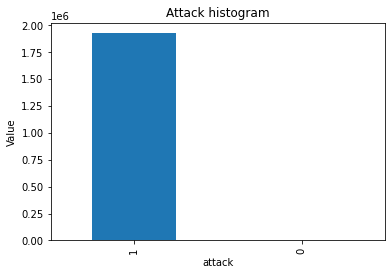

In [9]:
pd.value_counts(df['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['attack'].value_counts()

In [10]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)


In [11]:
X = df.iloc[:, df.columns != 'attack']
y = df.iloc[:, df.columns == 'attack']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
X_train, y_train = SMOTE(sampling_strategy=0.2).fit_resample(X_train, y_train)

In [14]:
y_train.value_counts()

attack
1         1155970
0          231194
dtype: int64

### Baseline:

In [15]:
classifier = DummyClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

Confusion matrix:
 [[     0    196]
 [     0 770638]]


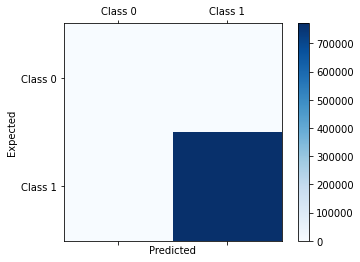

Accuracy 0.999745729949639


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       0.50      0.50      0.50    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
0.5


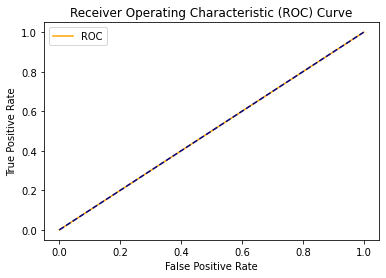

In [16]:
classif_results()

# Logistic Regression:


In [17]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion matrix:
 [[   195      1]
 [    11 770627]]


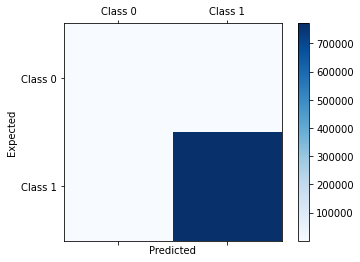

Accuracy 0.9999844324458963
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       0.97      1.00      0.99    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
0.9974418426481616


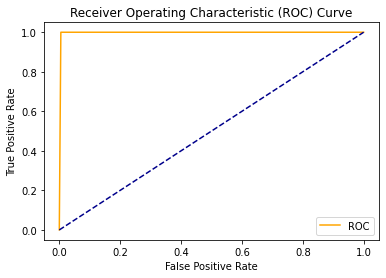

In [18]:
classif_results()

# Decision Trees

In [19]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)



Confusion matrix:
 [[   194      2]
 [     0 770638]]


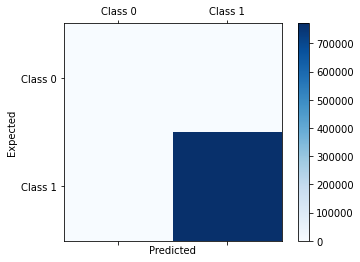

Accuracy 0.9999974054076494
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       1.00      0.99      1.00    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
0.9948979591836734


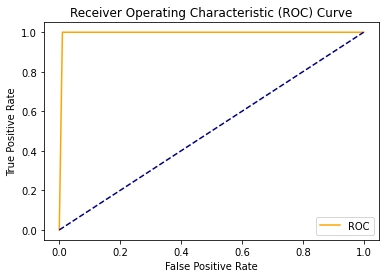

In [20]:
classif_results()

# Random Forest:

In [21]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Confusion matrix:
 [[   196      0]
 [     0 770638]]


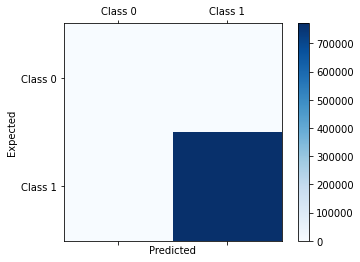

Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       1.00      1.00      1.00    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
1.0


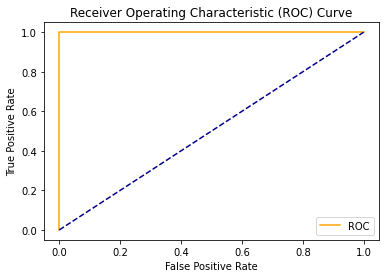

In [22]:
classif_results()

# KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
classif_results()

# Support Vector Machines:

In [23]:

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
 [[   196      0]
 [    42 770596]]


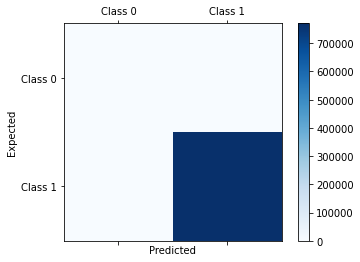

Accuracy 0.9999455135606369
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       0.91      1.00      0.95    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
0.9999727498514218


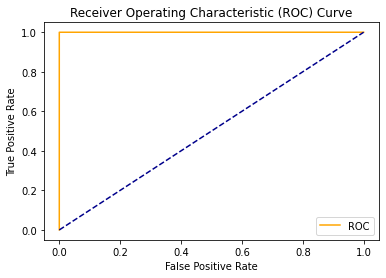

In [24]:
classif_results()

# Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB


classifier = GaussianNB()


classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
 [[   196      0]
 [   868 769770]]


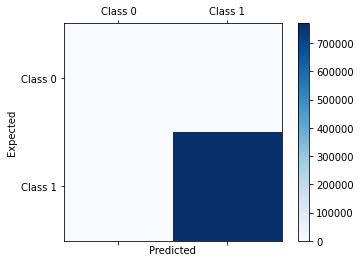

Accuracy 0.9988739469198297
              precision    recall  f1-score   support

           0       0.18      1.00      0.31       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       0.59      1.00      0.66    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
0.9994368302627175


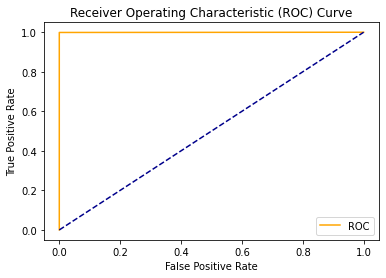

In [26]:
classif_results()

# Neural Network

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



classifier.fit(X_train, y_train, batch_size = 10, epochs = 3)


y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


Epoch 1/3
138717/138717 [==============================] - 244s 2ms/step - loss: 0.0116 - accuracy: 0.9998
Epoch 2/3
138717/138717 [==============================] - 246s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 3/3
138717/138717 [==============================] - 242s 2ms/step - loss: 0.0067 - accuracy: 1.0000


Confusion matrix:
 [[   195      1]
 [    11 770627]]


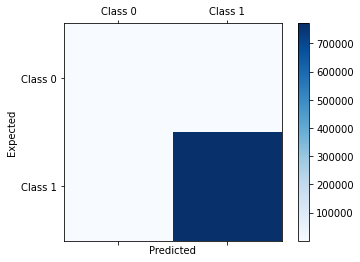

Accuracy 0.9999844324458963
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       0.97      1.00      0.99    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
0.9974418426481616


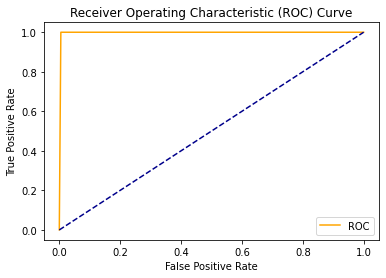

In [28]:
classif_results()